### Image Similarlity for NFTs Collection by extracting image features and cosine similarity to get the top N nearest neighbors

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from keras.applications.xception import Xception, preprocess_input
import tensorflow as tf
from keras.preprocessing import image
from keras.layers import Input
from keras.backend import reshape
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [2]:
images_dir = '../input/crypto-coven/witch_images/witch_images'

In [3]:
def get_image_paths(path):
    """
    function to combine directory path with individual image paths
    """
    image_names = []
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            if 'os.png' in filename:  # choose only the OpeaSea image
                fullpath = os.path.join(dirname, filename)
                image_names.append(fullpath)
    return image_names


def preprocess_img(img_path):
    dsize = (225, 225)
    new_image = cv2.imread(img_path)
    new_image = cv2.resize(new_image, dsize, interpolation=cv2.INTER_NEAREST)  
    new_image = np.expand_dims(new_image, axis=0)
    new_image = preprocess_input(new_image)
    return new_image


def model():
    model = Xception(weights='imagenet', include_top=False)
    for layer in model.layers:
        layer.trainable=False
        #model.summary()
    return model


def feature_extraction(image_data, model):
    features = model.predict(image_data)
    features = np.array(features)
    features = features.flatten()
    return features


def result_vector_cosine(model, feature_vector, new_img, n_results):
    new_feature = model.predict(new_img)
    new_feature = np.array(new_feature)
    new_feature = new_feature.flatten()
    nbrs = NearestNeighbors(n_neighbors=n_results, metric="cosine").fit(feature_vector)
    distances, indices = nbrs.kneighbors([new_feature])
    return (indices)


def show_query_image(data):
    plt.title("Query Image and Images most similar to queried image")
    plt.imshow(data)
    plt.xticks([])
    plt.yticks([])


# 12 is hardcoded for now
def show_result(data, result):
    fig = plt.figure(figsize=(12,8))
    for i in range(0,12):
        index_result = result[0][i]
        plt.subplot(3, 4, i+1)
        plt.imshow(cv2.imread(data[index_result]))
        plt.xticks([])
        plt.yticks([])
    plt.show()

In [4]:
images = get_image_paths(images_dir)

In [5]:
images[:5]

['../input/crypto-coven/witch_images/witch_images/5550/5550_os.png',
 '../input/crypto-coven/witch_images/witch_images/3347/3347_os.png',
 '../input/crypto-coven/witch_images/witch_images/3531/3531_os.png',
 '../input/crypto-coven/witch_images/witch_images/437/437_os.png',
 '../input/crypto-coven/witch_images/witch_images/1520/1520_os.png']

In [6]:
%%time
# extract features for each image
features = []
main_model = model()

for i in images[:3000]:  # only extract the first 1000 to save time, remove [:1000] as you see fit
    new_img = preprocess_img(i)
    features.append(feature_extraction(new_img, main_model))

feature_vec = np.array(features)


2022-05-05 15:36:54.476774: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-05 15:36:54.581629: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-05 15:36:54.582493: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-05 15:36:54.583803: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

83697664/83683744 [==============================] - 1s 0us/step


2022-05-05 15:36:59.769903: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-05-05 15:37:01.166463: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


CPU times: user 2min 39s, sys: 8.26 s, total: 2min 47s
Wall time: 3min 11s


../input/crypto-coven/witch_images/witch_images/6922/6922_os.png
[[ 130  171  742 2294 2721  834 2810 2903  898 1335 1898  803 1816 1194
   520  383]]
../input/crypto-coven/witch_images/witch_images/6922/6922_os.png
../input/crypto-coven/witch_images/witch_images/7520/7520_os.png
../input/crypto-coven/witch_images/witch_images/6293/6293_os.png
../input/crypto-coven/witch_images/witch_images/8261/8261_os.png
../input/crypto-coven/witch_images/witch_images/1183/1183_os.png
../input/crypto-coven/witch_images/witch_images/222/222_os.png
../input/crypto-coven/witch_images/witch_images/2772/2772_os.png
../input/crypto-coven/witch_images/witch_images/4485/4485_os.png
../input/crypto-coven/witch_images/witch_images/1690/1690_os.png
../input/crypto-coven/witch_images/witch_images/9755/9755_os.png
../input/crypto-coven/witch_images/witch_images/5417/5417_os.png
../input/crypto-coven/witch_images/witch_images/8460/8460_os.png
../input/crypto-coven/witch_images/witch_images/2929/2929_os.png
../inp

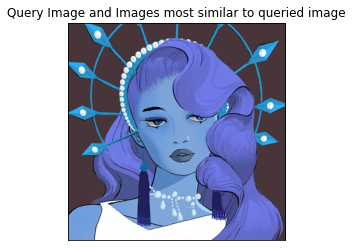

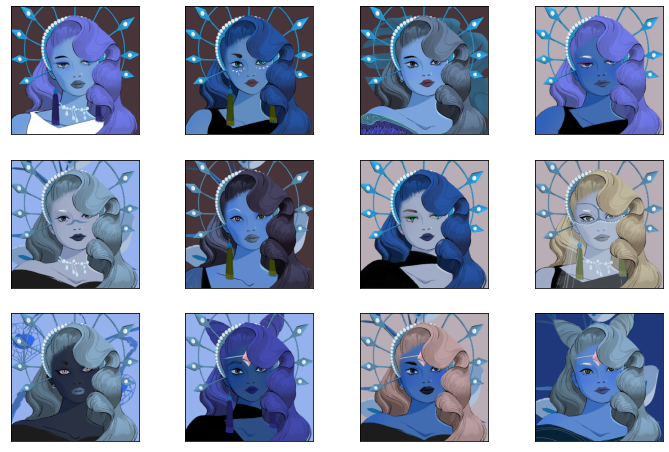

In [9]:
# change the number to try different query image

query_image = images[130]

# print query image name
print(query_image)

# result are the index numbers for the 12 most similar images
top_similar_image_indexes = result_vector_cosine(main_model, feature_vec, preprocess_img(query_image), 16)
print(top_similar_image_indexes)
# print result image names
for i in range(0,16):
    j = top_similar_image_indexes[0][i]
    print(images[j])

show_query_image(cv2.imread(query_image))

show_result(images, top_similar_image_indexes)